In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_excel ('/content/newaxis.xlsx')

print (df)

           Date   Adj_Close
0    2015-01-01  488.996094
1    2015-01-02  499.931854
2    2015-01-05  503.091003
3    2015-01-06  485.107880
4    2015-01-07  484.719055
...         ...         ...
1474 2020-12-23  592.450012
1475 2020-12-24  610.200012
1476 2020-12-28  617.650024
1477 2020-12-29  630.200012
1478 2020-12-30  625.099976

[1479 rows x 2 columns]


Split Train and Test Dataset

In [90]:
X_train = df[:int(df.shape[0]*0.75)]
X_test = df[int(df.shape[0]*0.75):]

print(X_test)

           Date   Adj_Close
1109 2019-07-04  808.849976
1110 2019-07-05  806.099976
1111 2019-07-08  782.900024
1112 2019-07-09  786.200012
1113 2019-07-10  769.250000
...         ...         ...
1474 2020-12-23  592.450012
1475 2020-12-24  610.200012
1476 2020-12-28  617.650024
1477 2020-12-29  630.200012
1478 2020-12-30  625.099976

[370 rows x 2 columns]


Simple Moving Average for k=2

In [91]:
for i in range(0,df.shape[0]-1):
    df.loc[df.index[i+1],'SMA_2'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1]) /2),1)
    
df.head(1000)


,Date,Adj_Close,SMA_2
0,2015-01-01,488.996094,NaN
1,2015-01-02,499.931854,494.5
2,2015-01-05,503.091003,501.5
3,2015-01-06,485.107880,494.1
4,2015-01-07,484.719055,484.9
...,...,...,...
995,2019-01-14,658.382385,662.0
996,2019-01-15,659.780579,659.1
997,2019-01-16,663.176392,661.5
998,2019-01-17,675.810730,669.5


Root Mean Square Error

In [92]:
df.head()
rms = mean_squared_error(df['Adj_Close'][924:len(df)], df['SMA_2'][924:len(df)])
rms = sqrt(mean_squared_error(df['Adj_Close'][924:len(df)], df['SMA_2'][924:len(df)]))
print("Root Mean Square Error = " ,rms)


Root Mean Square Error =  7.4400067119466105


Plot the Graph

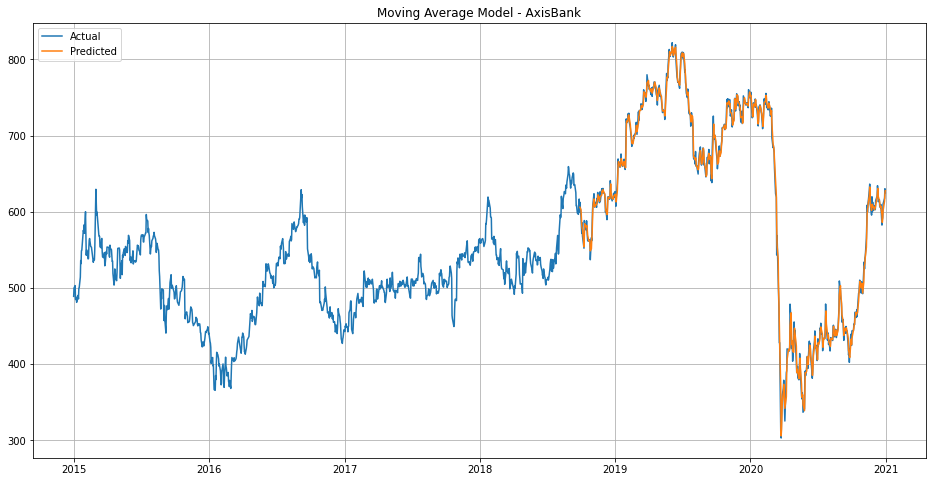

In [94]:
plt.figure(figsize=[16,8])
plt.title('Moving Average Model - AxisBank')
plt.grid(True)
df.set_index('Date',inplace=True)
plt.plot(df['Adj_Close'],label='Actual')
plt.plot(df['SMA_2'][924:len(df)],label='Predicted')
# plt.plot(df['SMA_3'][924:len(df)],label='SMA k=3 ')
plt.legend(loc=2)


